<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Logistic_Regression_IMDB_Coding_Session_4_with_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The IMDB dataset actually comes packaged with keras and its allready tokenized, menaing the text is allready converted in a sequence of unique word indices. The IMDB dataset contains 50,000 movie reviews (25,000 for training and 25,000 for testing). Each set contains of 50% positive and 50% negative reviews (12,500 x 2). 

In [0]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
vocabulary=7500 

Below code block has been commented out because software does not work any more

In [0]:
# save np.load
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)

# restore np.load for future normal usage
#np.load = np_load_old

New code fix

In [0]:
np.load.__defaults__=(None, True, True, 'ASCII')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)
np.load.__defaults__=(None, False, True, 'ASCII')

In [0]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
print(type(train_data[0]))

<class 'list'>


In [0]:
def vectorize_sequences(sequences, dimension=vocabulary):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

In [0]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [0]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [0]:
print(type(x_train[0]))

<class 'numpy.ndarray'>


In [0]:
print(type(y_train[0]))

<class 'numpy.float32'>


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("Accuracy:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.85852


In [0]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[10770,  1730],
       [ 1807, 10693]])

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)

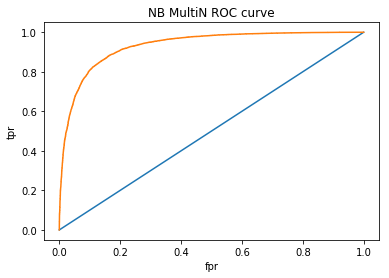

In [0]:
plt.plot([0,1], [0,1], '')
plt.plot(fpr, tpr, label='')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('NB MultiN ROC curve')
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score #area under the ROC curve
roc_auc_score(y_test, y_pred_proba)

0.9320648767999999